In [1164]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [1165]:
#Nacteni datasetu
df = pd.read_csv("../data/processed_data/1_data_clearing/1_clearing_cars.csv")

In [1166]:
#Priprava dat pro modelovani
df_cluster = df
df_cluster = df_cluster.drop(columns=["kraj", "stav", "model_auta", "typ_paliva", "typ_karoserie", "typ_prevodovky", "barva_exterieru", "metaliza"])

#Standardizace ciselnych atributu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster.values)

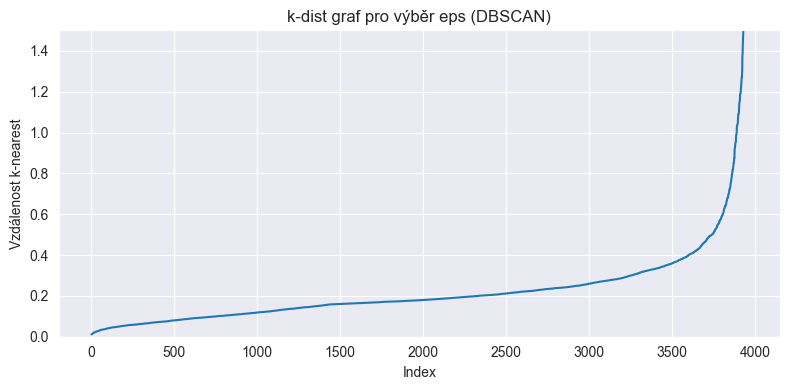

In [1167]:
#Hledani 5 nejblizsich sousedu
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])  # 4 = 5. soused

#Vizualizace k-dist
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.ylim([0, 1.5])
plt.title("k-dist graf pro výběr eps (DBSCAN)")
plt.xlabel("Index")
plt.ylabel("Vzdálenost k-nearest")
plt.grid(True)
plt.tight_layout()

plt.savefig("../figures/4_cluster_analysis/k_dist.png")  # Ulozeni

In [1168]:
#Nastaveni modelu
dbscan = DBSCAN(eps=0.46, min_samples=15)
clusters = dbscan.fit_predict(X_scaled)

df["cluster"] = clusters

In [1169]:
mask = df["cluster"] != -1
if df["cluster"].nunique() > 1:
    sil_score = silhouette_score(X_scaled[mask], df.loc[mask, "cluster"])
    print(f"Silhouette score: {sil_score:.4f}")

Silhouette score: 0.2182


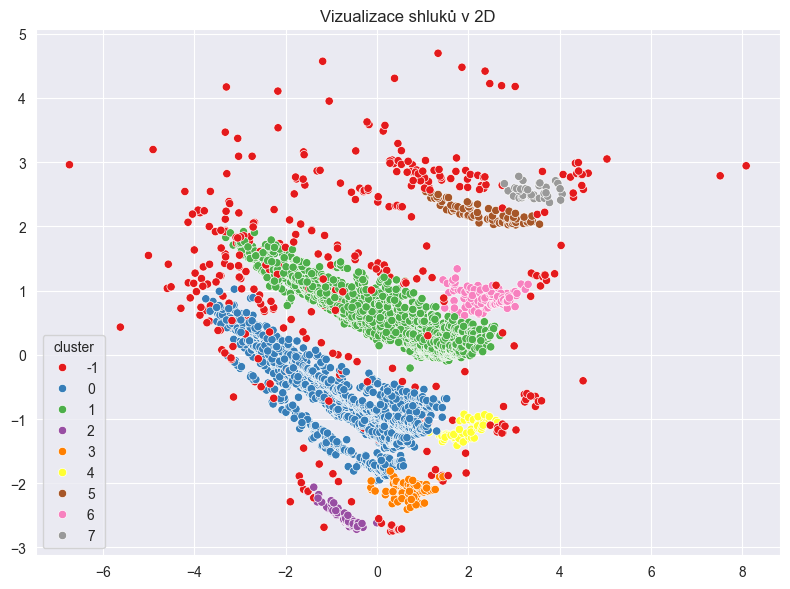

In [1170]:
#PCA pro vizualizaci v 2D
pca = PCA(n_components=2) #2 dimenze
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=X_pca[:, 0], y=X_pca[:, 1], hue="cluster", palette="Set1")
plt.title("Vizualizace shluků v 2D")
plt.grid(True)
plt.tight_layout()

plt.savefig("../figures/4_cluster_analysis/pca.png")  # Ulozeni

In [1171]:
#Vykresleni podilu sumu
pocet_sumu = (df["cluster"] == -1).sum()
celkem = len(df)
podil = pocet_sumu / celkem
print(f"Podíl šumu: {podil:.2%}")

Podíl šumu: 10.14%


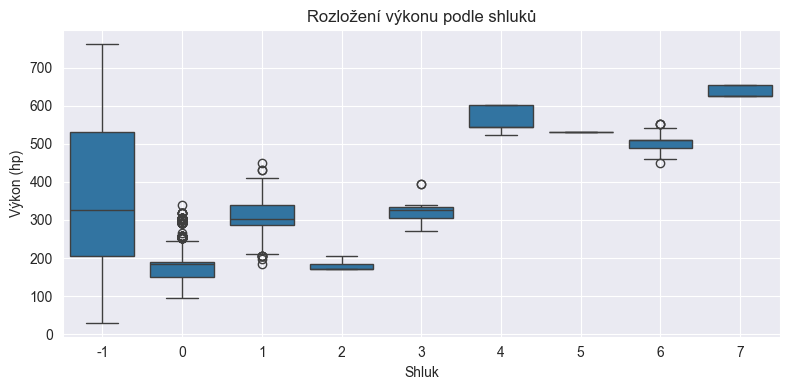

In [1172]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="cluster", y="vykon")
plt.title("Rozložení výkonu podle shluků")
plt.xlabel("Shluk")
plt.ylabel("Výkon (hp)")
plt.grid(True)
plt.tight_layout()

plt.savefig("../figures/4_cluster_analysis/boxplot_vykon.png")  # Ulozeni

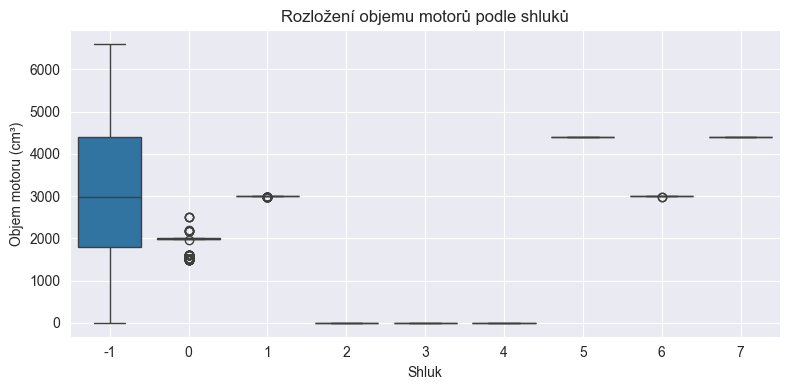

In [1173]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='cluster', y="objem_motoru")
plt.title("Rozložení objemu motorů podle shluků")
plt.xlabel("Shluk")
plt.ylabel("Objem motoru (cm³)")
plt.grid(True)
plt.tight_layout()

plt.savefig("../figures/4_cluster_analysis/boxplot_objem.png")  # Ulozeni

In [1174]:
print(df[df["cluster"] == 0].head(40))

   model_auta   cena   rok  najezd                 stav  vykon  objem_motoru  \
5      Řada 1  59900  2007  155500            neuvedeno    143          1995   
9      Řada 3  24999  2011  281401            neuvedeno    177          1995   
11     Řada 1  50000  2007  198976                Dobrý    116          1600   
13     Řada 3  44000  2005  230470                Dobrý    143          1995   
15     Řada 1  60000  2007  248289                Dobrý    116          1600   
16     Řada 3  45000  2005  276485                Dobrý    150          2000   
18     Řada 3  59000  2005  303000                Dobrý    143          1995   
19     Řada 3  59900  2006  172949  Způsobilý k provozu    150          1995   
20     Řada 3  69900  2004  245379          Velmi dobrý    150          1995   
21     Řada 1  60000  2006  273530            neuvedeno    163          1995   
22     Řada 3  72000  2006  260001            neuvedeno    129          1995   
23     Řada 3  77000  2008  211322      

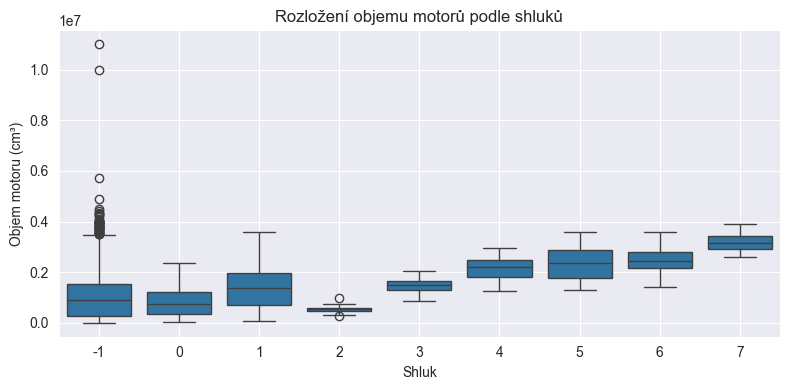

In [1175]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='cluster', y="cena")
plt.title("Rozložení objemu motorů podle shluků")
plt.xlabel("Shluk")
plt.ylabel("Objem motoru (cm³)")
plt.grid(True)
plt.tight_layout()

#plt.savefig("../figures/4_cluster_analysis/boxplot_objem.png")  # Ulozeni